# Unsupervised Machine Learning


### What is unsupervised learning and how is it used in NLP? 

Remember how we do supervised learning? Get data with labels, find a good data representation/do feature engineering, and train a model. But what if we don't have labelled data? The majority of textual data is, in fact, unlabelled. And labelling is expensive! Can we still mine such data for useful patterns?

**Unsupervised machine learning** looks for patterns in **unlabelled data** and with **no or minimal human supervision**.

![] (https://miro.medium.com/max/2232/1*BKvYt1EHtzHOd_HWjm-Jrw.png)
(Image source: https://towardsdatascience.com/unsupervised-machine-learning-example-in-keras-8c8bf9e63ee0)

## Clustering 

**Clustering** is an unsupervised machine learning technique for splitting a set of unlabelled data points into groups (clusters) of points considered by the algorithm as similar.

In NLP, a common application of clustering is **document clustering**  -  uncovering hidden structure within a corpus and grouping similar documents into categories (without labels or human supervision!). 

Steps:
- vectorise documents (e.g. count-based, TF-IDF)
- apply a clustering algorithm (e.g. K-means)


** Hard vs Soft Clustering **
- hard clustering : Each sample belongs to exactly one cluster.
- soft clustering: Each  sample can belong to one or more clusters.

![](https://miro.medium.com/max/500/1*bBYxRxPveZ8khii6Ge2T5Q.png)



#### K-Means clustering algorithm

It is one of the most commonly used ones. 
Watch this video (8m 30sec) to learn about how it works: https://www.youtube.com/watch?v=4b5d3muPQmA



Steps:
- specify the number of clusters K (your choice! but there are some *smater* ways to choose this number)
- initialize K centroids (randomly)
- assign each data point to the cluster whose centroid is closest to it
- recalculate the centroid location (find a new centre of the cluster) for each cluster as a mean of the points within the cluster
- assign each vector data point to the centroid closest to it
- keep iterating until centroids (and assignment of data points to clusters) do not chnage anymore ('converged')


![](https://www.researchgate.net/profile/Andras_Kalmar/publication/321051036/figure/fig5/AS:563793287290885@1511430202869/Steps-of-the-K-mean-clustering-algorithm.png)
(Image source: https://www.researchgate.net/figure/Steps-of-the-K-mean-clustering-algorithm_fig5_321051036)

![](https://miro.medium.com/max/500/1*-Ox371N1-L4oyJBRhi1uZw.gif)

### Text clustering using Tf-IDF as features


Let's import some data to explore: it is a BBC dataset containing news texts in 5 categories: business, entertainment, politics, sport and tech.

In [ ]:
import requests
import pandas as pd
import requests
import io

url="https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv"
s=requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

data.head()

/opt/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


Let's check we indeed have there five categories:

In [ ]:
category_counts = data.category.value_counts()
categories = category_counts.index
print(categories)

Index(['sport', 'business', 'politics', 'tech', 'entertainment'], dtype='object')
/opt/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Install the packages we will need:

In [ ]:
!pip install seaborn
!pip install  wordcloud
!pip install gensim
!pip install nltk

  

     |████████████████████████████████| 283 kB 7.0 MB/s 
     |████████████████████████████████| 366 kB 6.5 MB/s 
     |████████████████████████████████| 24.2 MB 347 kB/s 
     |████████████████████████████████| 106 kB 43.4 MB/s 
  Created wheel for smart-open: filename=smart_open-4.0.0-py3-none-any.whl size=108254 sha256=5e1e0cd320bf3bb3cb44999f68fc403fc68e3026199cd23463659fbae4a6122e
  Stored in directory: /home/jovyan/.cache/pip/wheels/97/ef/4b/832eae6b1e594ffe720e8a0d0a3c024d7e4956ce3d38a1747f
Successfully built smart-open


In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

/opt/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of texts in each category:

/opt/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


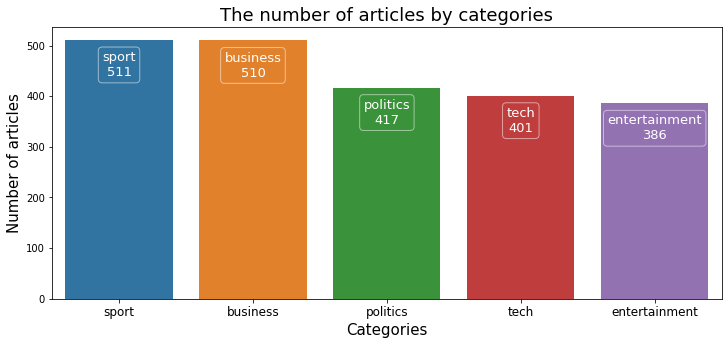

In [ ]:
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)
sns.barplot(x = category_counts.index , y = category_counts)
for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
plt.xlabel('Categories', size = 15)
plt.ylabel('Number of articles', size= 15)
plt.xticks(size = 12)

plt.title("The number of articles by categories" , size = 18)
plt.show()

Extract Tf-iDF features from the news text dataset:

**Code IT (1)** Using the TfidfVectorizer class of sklearn library(refer to Practical 9 notebook) extract the tf-idf features from the data.



**Note** Set the maximum number of features to 1000 to avoid long processing times. You may refer to the [sklearn documentation on TFidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = data.text
def get_tfidf_features(texts):
    #insert your code here    
    return features
features = get_tfidf_features(texts)



/opt/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Documentation for Sklearn KMeans implementation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

-  ** n_clusters** = number of clusters to form as well as the number of centroids to generate (default=8)

Number of clusters is the only parameter required. There are some optional one, too:

- **random_state** = set it to an integer to make the process deterministic
- **init** - there are different ways to initialise centroids, inc. passing an array (not random anymore!)



In the following code we use KMeans clustering implementation of sklearn library to fit a model on the tf-idf features we extracted from text data.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

Then we use the model to put the samples in the clusters:

In [ ]:
kmeans_results = kmeans.predict(features)

In order to visualize the results, we plot the wordcloud of the samples clustered into one category for each of the 5 categories:



** CODE IT (2)**  Use [this code piece](https://python-graph-gallery.com/260-basic-wordcloud/) to create wordclouds for each of the clusters inside the loop(in the for loop the text is saved in variable called **text**)

In [ ]:
from wordcloud import WordCloud
result={'cluster':kmeans_results,'text':data.text}
result=pd.DataFrame(result)
for k in range(0,5):
   s=result[result.cluster==k]
   text=s['text'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   print('Cluster: {}'.format(k)) 

   #insert your code here 
   

**Observe and Reflect (3)** Map clusters 1-5 illustrated in wordcloud to the categories : sport, business, politics, technology, entertainment

Give a brief explanation how you chose each cluster's tag.


### write your code here

### Visualize cluster samples in a 2-dimentional coordinate space

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
def find_coords(X,assigned_clusterers,predicted_classes):
    tsne = TSNE(n_components = 2)                      
    X_tsne = tsne.fit_transform(X)
    df_coords = pd.DataFrame(X_tsne , columns = ['x', 'y'] )

    df_coords['clusters'] = assigned_clusterers
    df_coords['pred_labels'] = predicted_classes
    return df_coords
        

classes  = data['category']
df_coords = find_coords(features,classes,kmeans_results)


In [ ]:
sns.scatterplot(x =df_coords.x, y = df_coords.y, hue =df_coords.pred_labels ,palette="Set2")

----

### Topic modelling

**Topic modelling** is an unsupervised machine learning technique (a family of algorithms) which provides a way to automatically organise, understand, search and summarise large amounts of text. 

What do we mean by **topics**?
Let's imagine that we have a collection of 200 scientific papers, and we want to find out what themes this text collection covers. 


Let's also imaging that these 200 texts have (combined) **vocabulary** of 3000 (unique) words.

**Topic** is a probability disctibution over this vocabulary, which allows us to identify clusters of words that are more likely to occur together in **the same document**.

Here we have our pile of papers. Each of them has words from the vocabulary. Topic modelling algorithsm are designed to take these documents as input (in the form of **bags of words**) and return as an output for each document two things: 
- all topics our corpus contains, each topic represented as a list of weighted words (e.g. "yellow" topic below: "gene" - probabilty 0.04, "dna" - probability 0.02....)
- distribution of topics in each document (e.g. document below consists mostly of words from the "yellow" topic, has some words from "pink" and "blue" topics, and nothing from the "green" topic)


![] (https://miro.medium.com/max/700/1*pZo_IcxW1GVuH2vQKdoIMQ.jpeg)

It is an unsupervised model because the data is unlabelled. However, the algorithm does require setting up one parameter: number of topics. It is tricky because it is completely arbitrary. Usually it is set to 50-200 topics.  


In [ ]:
!pip install pyLDAvis

Run the flllowing code applying topic modeling on the same data we used in the previous section (no need to change the code now).

In [ ]:
import nltk
from gensim import corpora, models
from nltk.corpus import stopwords

texts = data.text

tokens = [text.split() for text in texts]


#insert your code here

dictionary_LDA = corpora.Dictionary(tokens)
print(dictionary_LDA)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in tokens]

num_topics = 5
lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))


%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

## Whaaaaat?!?!

yes of course! We forgot to remove stop words!!

**CODEIT (4)** fix the above code by removing stop words and see how the topics change.

**Observe and Reflect (5)** Can you still find a match between topics found by topic modeling method and the tagged categories? Explain which words related to each topic of the output you can associate with each cateogry.


### write you answer here

## Topic modeling with Mallet

MALLET(MAchine Learning LangugE Toolkit) is a java-based tool intergating tools for some statistical machine learning applications.

[This Demo](https://mimno.infosci.cornell.edu/jsLDA/jslda.html)  incorporates a web based MALLET topic model implementation.


![](http://mallet.cs.umass.edu/logo3.png)

----

Download MALLET package [here](http://mallet.cs.umass.edu/download.php), compile it and use the follwoing wrapper code in python's gensim library to use it as a python library.

**NOTE:** The following code will not run until you download the mallet package and compile it and put the executive file address in path_to_mallet variable.

In [ ]:
from gensim.models.wrappers import LdaMallet
model = LdaMallet(path_to_mallet, corpus, num_topics=5, id2word=dictionary_LDA)

## Use of topic modeling by historians:


https://dsl.richmond.edu/dispatch/

http://www.cameronblevins.org/posts/topic-modeling-martha-ballards-diary/

**Important note regarding Unsupervised Machine Learning: ** In the exercises above we used a dataset which was already labeled with categories and we could map the results of the method on the categories we already were aware of, however unsupervised machine learning approaches are useful when there is no labeled data. Thus, in such methods the number of topics/categories or category labels is set through trial and error.

----------


** Homework (6) ** Explain briefly what hierarchical clustering is. 

### Write your answer here

#### References:

https://www.kaggle.com/cempek/bbc-nltk-clustering-word2vec-vs-tfidfvectorizer

https://towardsdatascience.com/a-friendly-introduction-to-text-clustering-fa996bcefd04

http://mallet.cs.umass.edu/